In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Estimation

### Sample Median

In [2]:
sf = Table.read_table('san_francisco_2015.csv')
sf.show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2


**Question:** What is this dataset?

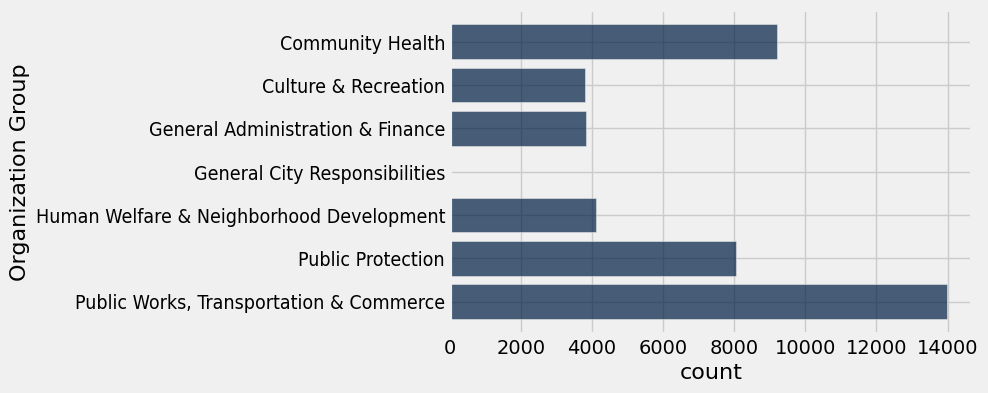

In [6]:
salary_sf.group(0).barh(0)

In [ ]:
# skip

In [ ]:
# skip

In [ ]:
# skip

In [5]:
# We only care about salary for now
salary_sf = sf.select(3, 11, 21)
salary_sf

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,117767
"Public Works, Transportation & Commerce",Soft Floor Coverer,41209.8
Community Health,Health Care Billing Clerk 2,110561
Community Health,Food Service Mgr Administrator,38625
"Public Works, Transportation & Commerce",School Crossing Guard,11438.2
Public Protection,Police Officer,3188.65
Community Health,Nurse Practitioner,260281
"Public Works, Transportation & Commerce",Transit Operator,111057
General Administration & Finance,Attorney (Civil/Criminal),186781
Human Welfare & Neighborhood Development,Emp & Training Spec 2,103610


**Question:** Who is making the most money?

In [9]:
salary_sf.sort("Total Compensation").row(-1)

Row(Organization Group='General Administration & Finance', Job='Chief Investment Officer', Total Compensation=648875.23999999999)

In [11]:
type(salary_sf.sort("Total Compensation").row(-1))

datascience.tables.Row

What is different about a row vs an array

a row can contain different types

In [13]:
salary_sf.sort("Total Compensation").row(-1).item(1)

'Chief Investment Officer'

**Question:** Who is making the least money?

In [14]:
salary_sf.sort("Total Compensation").row(0).item(1)

'Firefighter'

**Question:** What is the typical salary? Should we compute the mean or median for this?

Lets compute both and then compare, we will look at the histogram of total comps at the end

In [16]:
np.mean(salary_sf.column("Total Compensation"))

98605.356720323791

How can we compute the median with what we covered today?
<details>
<summary>Solution</summary>
  percentile(50, sf.column('Total Compensation'))
</details>  

In [18]:
pop_median = percentile(50, salary_sf.column("Total Compensation"))
pop_median

98174.899999999994

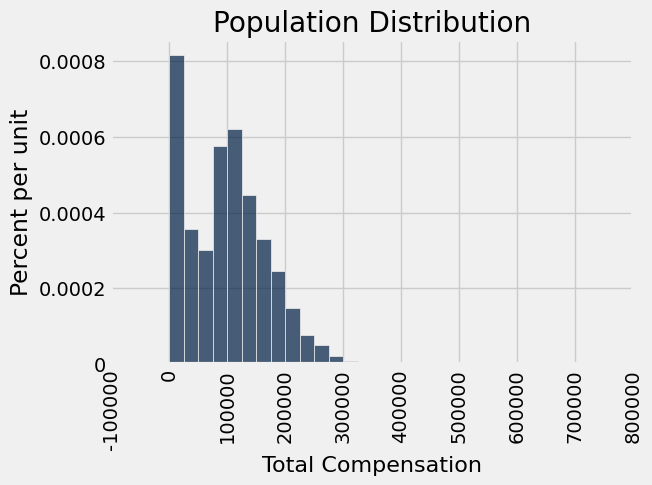

In [19]:
sf_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=sf_bins)
plots.title('Population Distribution');

### Estimating Salaries
Say we dont have access to all the salaries. What would we do to compute the 50% percentile of salaries?

In [ ]:
# skip

In [ ]:
# skip

In [ ]:
# skip

In [20]:
our_sample = sf.sample(300, with_replacement=False)
our_sample.show(5)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,23596,68694.6,28446.5,8223.6,105365,21095,13536.2,7993.76,42625,147990
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,351,Municipal Executive Association - Miscellaneous,9100,Street Transit,9172,"Manager II, MTA",46772,38188.9,0,0,38188.9,7106.96,4281.73,8532.49,19921.2,58110.1
Calendar,2015,5,Culture & Recreation,ART,Arts Commission,790,"SEIU - Miscellaneous, Local 1021",3500,Museum & Cultural Affairs,3549,Arts Program Assistant,44669,28890.5,0,981.81,29872.4,6093.63,5459.61,2528.47,14081.7,43954.1
Calendar,2015,1,Public Protection,FIR,Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H020,"Lieutenant, Fire Suppression",24873,139615,19682.1,12958.4,172255,29960.3,14132.9,2770.29,46863.4,219118
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,11953,21811.5,447.4,1750.29,24009.2,1296.78,1902.62,1837.09,5036.49,29045.7


In [21]:
estimate_median = percentile(50, our_sample.column('Total Compensation'))
estimate_median

99993.360000000001

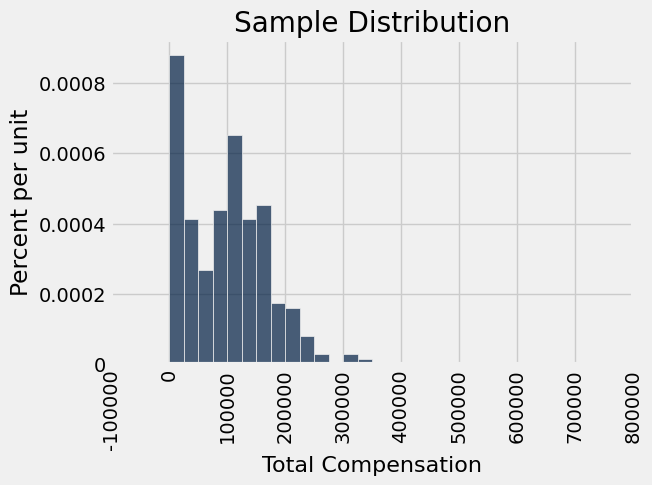

In [22]:
our_sample.hist('Total Compensation', bins=sf_bins)
plots.title('Sample Distribution');

**Question:** How far off is our estimate from the true median?

In [23]:
pop_median, estimate_median, abs(pop_median - estimate_median)

(98174.899999999994, 99993.360000000001, 1818.4600000000064)

## Variability of the Estimate

Let's implement the following function:

<details>
<summary>Solution</summary>
  our_sample = sf.sample(samp_size, with_replacement=False)
  return percentile(50, our_sample.column('Total Compensation'))
</details>


In [29]:
def generate_sample_median(samp_size):
    """
    Given a sample size
    Returns the median of a random sample of samp_size from the sf table"""
    # Question: sample with or without replacement?
    sample = salary_sf.sample(samp_size, with_replacement=False)
    total_comps = sample.column("Total Compensation")
    return percentile(50, total_comps)
    
    

sample_median = generate_sample_median(300)
sample_median

96149.160000000003

**Question:** What is our error?


<details>
<summary>Solution</summary>
  error = sample_median - pop_median
</details>


In [32]:
error = sample_median - pop_median
error

-2025.7399999999907

(back to slides)
# Quantifying Uncertainty

Lets take 1k estimates where each sample has 300 individuals


In [33]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = generate_sample_median(300)
    sample_medians = np.append(sample_medians, new_median)
sample_medians

array([  98796.21,   95599.43,   96712.91,   97080.12,   94624.15,
         94509.7 ,   95033.3 ,   94726.46,  101562.23,   95447.11,
         95086.37,   94776.92,   99157.13,   98094.64,   96510.91,
        101264.62,   94525.66,  103547.78,   92483.66,   93461.34,
         98114.61,  105291.3 ,   90716.94,  106949.12,   99506.16,
         97746.  ,   93309.47,   99556.55,   91518.15,   99928.95,
         96867.67,   97412.88,   94943.37,   93648.07,  100665.36,
         98769.61,  105790.  ,   94142.16,   96640.96,  101318.32,
         94984.4 ,   92760.4 ,   93006.16,   99827.83,   90282.27,
         94241.09,   95018.68,   95259.75,   94116.49,   97080.12,
         90585.19,  100159.46,   99045.63,   91589.53,  101626.56,
         91268.28,   94904.81,   99914.21,   96558.16,   96835.39,
         90937.99,   99924.44,   95471.79,   98975.54,   96265.1 ,
         97133.66,   97450.56,  100535.48,  103596.78,  103176.15,
        100377.21,   97979.48,  101122.03,   97165.23,   94896

Let's plot the medians

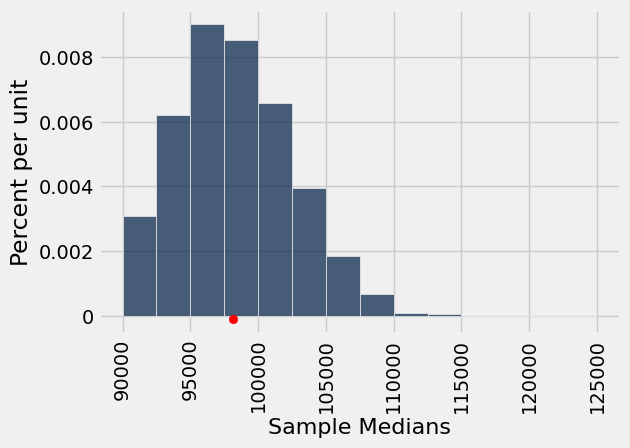

In [34]:
med_bins = np.arange(90000, 125001, 2500)
Table().with_column(
    'Sample Medians', sample_medians
).hist(bins = med_bins)

plots.scatter(pop_median, -1e-6, color="red");

Lets plot the errors

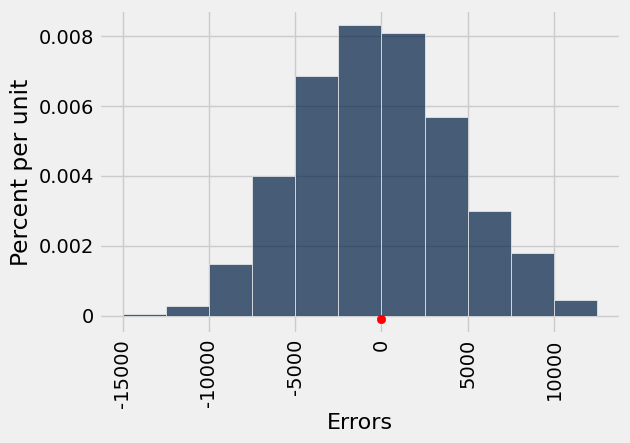

In [35]:
err_bins = np.arange(-15000, 12501, 2500)
Table().with_column(
    'Errors', sample_medians - pop_median
).hist(bins = err_bins)

plots.scatter(0, -1e-6, color="red");

(back to slides)
# Bootstrap

In [36]:
our_sample

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,23596,68694.6,28446.5,8223.6,105365,21095,13536.2,7993.76,42625,147990
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,351,Municipal Executive Association - Miscellaneous,9100,Street Transit,9172,"Manager II, MTA",46772,38188.9,0,0,38188.9,7106.96,4281.73,8532.49,19921.2,58110.1
Calendar,2015,5,Culture & Recreation,ART,Arts Commission,790,"SEIU - Miscellaneous, Local 1021",3500,Museum & Cultural Affairs,3549,Arts Program Assistant,44669,28890.5,0,981.81,29872.4,6093.63,5459.61,2528.47,14081.7,43954.1
Calendar,2015,1,Public Protection,FIR,Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,H020,"Lieutenant, Fire Suppression",24873,139615,19682.1,12958.4,172255,29960.3,14132.9,2770.29,46863.4,219118
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,P103,Special Nurse,11953,21811.5,447.4,1750.29,24009.2,1296.78,1902.62,1837.09,5036.49,29045.7
Calendar,2015,2,"Public Works, Transportation & Commerce",PRT,Port,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1634,Principal Account Clerk,32400,27614.5,0,0,27614.5,6193.93,5256.52,2189.08,13639.5,41254
Calendar,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",3600,Library,3602,Library Page,12659,7890.3,0,87.09,7977.39,2047.57,2380.36,642.6,5070.53,13047.9
Calendar,2015,6,General Administration & Finance,CAT,City Attorney,311,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),1968,166208,0,1450,167658,33935.8,11209.5,10496.2,55641.5,223299
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,200,"Transportation Workers, Local 200",9100,Street Transit,9139,Transit Supervisor,36189,83214.2,4478.26,5616.13,93308.6,17812,12615.6,7649.55,38077.2,131386
Calendar,2015,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,790,"SEIU - Miscellaneous, Local 1021",2700,Housekeeping & Laundry,2708,Custodian,8470,56531,0,8246.72,64777.7,12688.9,12424.5,5088.44,30201.9,94979.6


In [37]:
# Take a bootstrap (re)sample of size 300, WITH replacement

# Sample from our sample
boot_sample = our_sample.sample(with_replacement=True)
#boot_sample

In [39]:
percentile(50, boot_sample.column("Total Compensation"))

99379.910000000003

Let's compare the median from our sample with the median of the boostrapped sample

In [40]:
our_sample_median = percentile(50, our_sample.column('Total Compensation'))
boot_sample_median = percentile(50, boot_sample.column('Total Compensation'))

Population Median =        98174.9
Our Sample Median =        99993.36
Bootstrap Sample Median =  99379.91


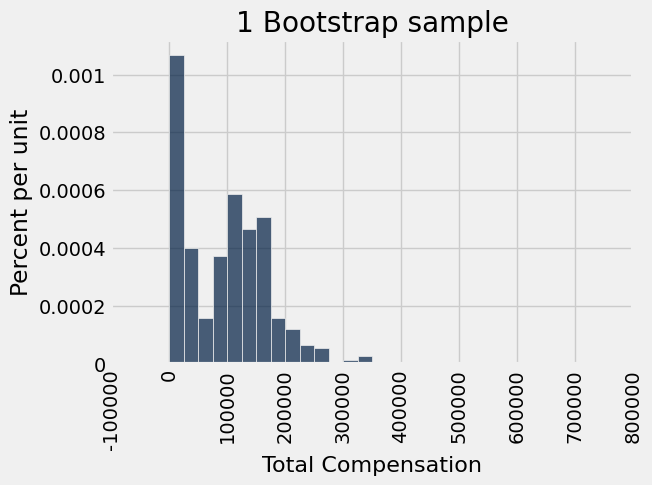

In [41]:
# Show the bootstrap sample 
boot_sample.hist('Total Compensation', bins=sf_bins)
plots.title('1 Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", our_sample_median)
print("Bootstrap Sample Median = ", 
      percentile(50,boot_sample.column('Total Compensation')))

### Multiple Bootstraps
Let's take 1k bootstraps. Lets start by implementing the following function

<details>
<summary>Solution</summary>
   single_sample = our_sample.sample()
   return percentile(50, single_sample.column('Total Compensation'))
</details>  

In [43]:
def one_bootstrap_median():
    single_sample = our_sample.sample(with_replacement=True)
    return percentile(50, single_sample.column("Total Compensation"))

In [48]:
one_bootstrap_median()

101500.58

Now let's keep track of 1k bootstrapped median

In [50]:
%%time
# Bootstrap our sample 1000 times
bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

CPU times: user 3.64 s, sys: 10.5 ms, total: 3.65 s
Wall time: 3.64 s


Let's visualize these bootstrapped medians

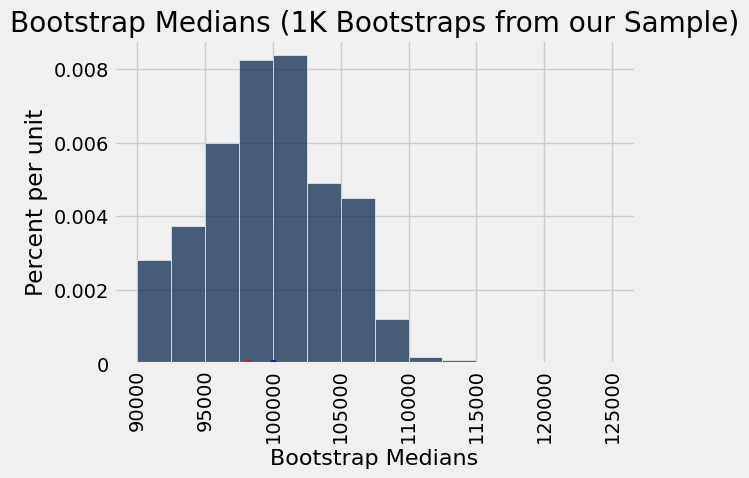

In [53]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.scatter(pop_median, 0, color="red");
plots.scatter(our_sample_median, 0, color="blue");
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

# 95% Confidence Interval

**Question**: How could we make an interval based on the middle 95% of bootstrap samples?

- *Hint 1:* Remember we stored the bootstrapped medians in an array called `bootstrap_medians`
- *Hint 2:* What did we learn about in the begining of this lecture?


<details>
<summary>Solution</summary>
  left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)
</details>  

In [54]:
bootstrap_medians

array([ 101133.34,   95904.07,  101030.2 ,   91127.84,  103287.66,
        102077.48,  101030.2 ,  104316.12,   97515.83,  101500.58,
        106677.48,   95904.07,  102304.92,   88701.44,  103075.68,
         93633.77,   95904.07,  104316.12,  106677.48,   97515.83,
         92921.5 ,  101133.34,   97515.83,  103075.68,  108638.82,
         99379.91,   93633.77,  106448.57,  106816.46,   95904.07,
         89770.31,  107920.17,   99379.91,  104193.48,   99379.91,
        102304.92,   99921.51,  104193.48,  103075.68,   88865.55,
         99993.36,   94979.6 ,   99379.91,  105959.55,   83568.85,
         99379.91,   92160.52,   99993.36,  104316.12,   92921.5 ,
         92286.96,  102077.48,  106816.46,  101133.34,  101030.2 ,
        103287.66,  107920.17,  101500.58,  101500.58,   99379.91,
         99921.51,  101133.34,  105959.55,   96986.35,   88865.55,
        106215.57,  106215.57,  108267.25,   91127.84,  106215.57,
         96399.17,  101133.34,   99921.51,  101500.58,   93633

In [58]:
# Make an interval based on the middle 95% of bootstrap samples

left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

In [59]:
left, right

(88688.169999999998, 107920.17)

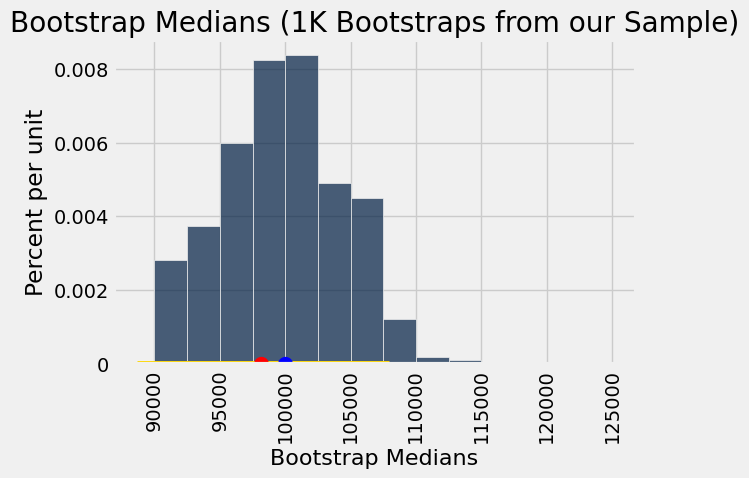

In [63]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=med_bins)

plots.plot([left, right], [0,0], color="gold",lw=5, zorder=1);
plots.scatter(pop_median, 0, color="red", lw=5, zorder=2);
plots.scatter(our_sample_median, 0, color="blue",lw=5, zorder=2);
plots.title('Bootstrap Medians (1K Bootstraps from our Sample)');

## Another Example: Mean Maternal Age

In [64]:
# This time we have a sample, but no population data!
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


How can we see a distribution of maternal ages?

<details>
<summary>Solution</summary>
  births.hist('Maternal Age')
</details>  

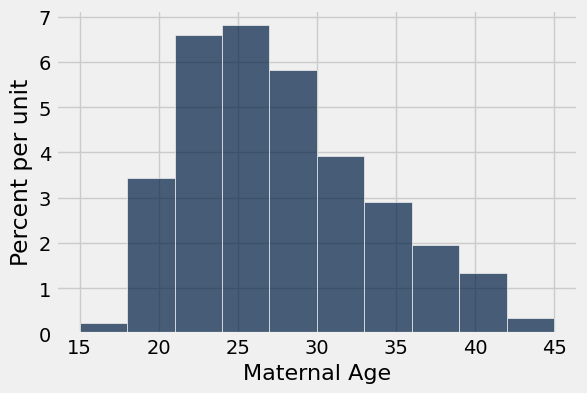

In [65]:
  births.hist('Maternal Age')


What is the mean age?

In [69]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

27.228279386712096

In [70]:
median_age = np.median(births.column('Maternal Age'))
median_age

26.0

Now let's use bootstraping to find samples means

<details>
<summary>Solution</summary>
  np.mean(births.sample().column('Maternal Age'))
</details>  

In [131]:
our_sample = births.sample(300, with_replacement=False)
our_sample_ages = our_sample.column('Maternal Age')

In [132]:
def one_bootstrap_mean():
    return np.mean(our_sample.sample(with_replacement=True).column("Maternal Age"))

In [133]:
np.mean(our_sample_ages)

26.893333333333334

In [134]:
one_bootstrap_mean()

26.649999999999999

Let's compute 1k bootstrapped samples

In [135]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

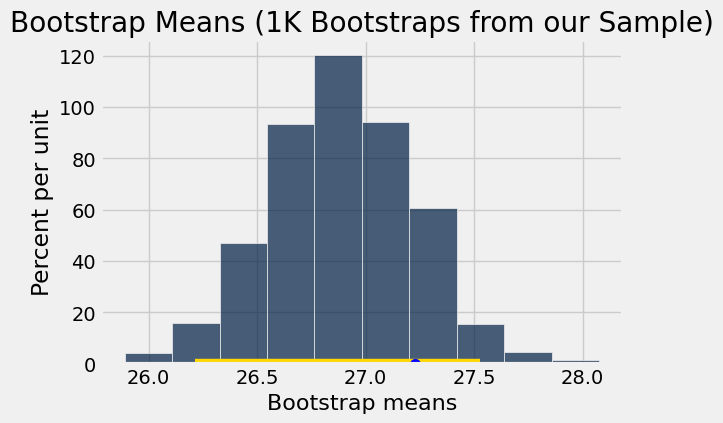

In [136]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=7.5, zorder=1);
plots.scatter(mean_age,0,color="blue",lw=2, zorder=2);
#plots.scatter(np.mean(births.column("Maternal Age")),0,color="red",lw=2,zorder=3);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');

In [119]:
np.mean(births.column("Maternal Age"))

27.228279386712096

## Is this technique reliable?


Repeat this process 100 times and keep track of how many times the true population parameter was indeed in this interval

*Run this before discussing it because it will take about a minute to run*

In [146]:
%%time
# This will take a while to run
intervals = Table().with_columns('Lower', make_array(), 'Upper', make_array())

for i in np.arange(100):
    sample_from_pop = births.sample(300, with_replacement=False)
    means = make_array()
    
    for j in np.arange(1000):
        resample = sample_from_pop.sample(with_replacement=True)
        mean = np.average(resample.column('Maternal Age'))
        means = np.append(means, mean)
        
    interval = make_array(
                percentile(2.5, means), 
                percentile(97.5, means))
    
    intervals.append(interval)

CPU times: user 1min 38s, sys: 103 ms, total: 1min 39s
Wall time: 1min 39s


Now let's check how many times our intervals included the true parameter

In [147]:
true_mean = np.average(births.column('Maternal Age'))
intervals.where('Lower', are.not_above(true_mean)).where('Upper', are.not_below(true_mean)).num_rows

98

In [139]:
true_mean, intervals

(27.228279386712096,
 Lower   | Upper
 26.23   | 27.5067
 26.3167 | 27.6067
 26.7433 | 28.1067
 27.1333 | 28.5533
 26.1933 | 27.3967
 26.5267 | 27.94
 26.5267 | 27.8133
 26.8933 | 28.2033
 26.6267 | 27.9433
 26.5133 | 27.91
 ... (90 rows omitted))

**Question:** How many times was the true mean below our lower bound?

<details>
<summary>Solution</summary>
    intervals.where('Lower', are.above(true_mean))
</details>   

In [148]:
intervals

Lower,Upper
26.42,27.6967
25.9733,27.29
27.2867,28.6567
26.5767,27.82
26.2367,27.4833
26.6833,28.0067
26.5933,27.9033
26.56,27.8533
26.2733,27.77
26.3233,27.66


In [143]:
true_mean

27.228279386712096

In [151]:
intervals.where('Lower',are.not_below_or_equal_to(true_mean)) #.num_rows

Lower,Upper
27.2867,28.6567


**Question:** How many times was the true mean above our upper bound?

<details>
<summary>Solution</summary>
    intervals.where('Upper', are.below(true_mean))
</details>   

In [152]:
intervals.where('Upper',are.below(true_mean))#

Lower,Upper
25.8667,27.19
